In [1]:
# -*- coding: utf-8 -*-

In [238]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random as rd
import math
%matplotlib inline
from scipy import ndimage

In [275]:
def generate_image(text, W, H, fontpath, font_size):
    # Create a black image
    img = np.full((H,W,3), 0, np.uint8)
#     img = cv2.filter2D(img, -3, kernel_sharpen)
    
    fontColor              = (30,0,0,0)
    font = ImageFont.truetype(fontpath, font_size)
    
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    w, h = draw.textsize(text, font = font)
   
    while w > W:
        font_size -= 1
        font = ImageFont.truetype(fontpath, font_size)
        w, h = draw.textsize(text, font = font)
        
    x = 0#rd.randint(0, max(W-w-1, 0))
    y = 0#rd.randint(0, max(H-h-1, 0))
#     x,y = 0,0
#    draw.text(((W-w)/2,(H-h)/2), msg, fill="black")
    draw.text((x,y), text, font = font, fill = fontColor)
    
    img = np.array(img_pil)
    return img


In [276]:
def speckle(img, maximum):
    severity = np.random.uniform(0, 1) * maximum
    blur = ndimage.gaussian_filter(np.random.randn(*img.shape) * severity, 4, truncate=10)
    img_speck = img + blur
    img_speck[img_speck > 255] = 255
    img_speck[img_speck <= 0] = 0
    img_speck = np.array(img_speck.astype(np.ubyte))
    return img_speck

In [277]:
def sp_noise(image,maximum):
    output = np.zeros(image.shape,np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = rd.randint(0, maximum)
            if rdn < 0:
                output[i][j] = 0
            elif rdn > 255:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j] + rdn
    return output

In [278]:
def sp_noise2(image,maximum):
    blur = np.random.rand(*image.shape) * maximum
    img_speck = image + blur
    img_speck[img_speck > 255] = 255
    img_speck[img_speck <= 0] = 0
    img_speck = np.array(img_speck.astype(np.ubyte))
    return img_speck

In [279]:
noise_typ = ["gauss","s&p", "poisson", "speckle"]



def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

In [282]:
def resize(img, w, h ):
    inWidth = img.shape[1]
    inHeight = img.shape[0]
    dstWidth = w
    dstHeight = h
    scaleFactorX = dstWidth / inWidth;
    scaleFactorY = dstHeight / inHeight;

#     if (dstWidth > inWidth):
#         scaleFactor = max(scaleFactorX, scaleFactorY);
#     else:
    scaleFactor = min(scaleFactorX, scaleFactorY);

    newW = int(inWidth * scaleFactor)    
    newH = int(inHeight * scaleFactor)
    y = int((dstHeight - newH)/2)
    img_new = np.full((48,400), 0)
    
    
    img_new[y:(newH+y),:newW] = cv2.resize(img, ( newW, newH))[:,:]
    return img_new

(17, 274)


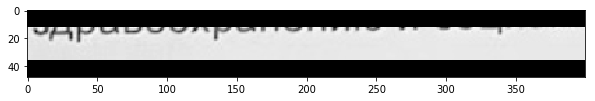

In [297]:
img = cv2.imread("./data/images/20180316_123418_333.jpg", cv2.COLOR_BGR2GRAY)[:,:,0]
print(img.shape)

img2 = resize(img, 400, 48)

# img = cv2.resize(img, (400,48))
fig = plt.figure(figsize=(10, 10))
plt.imshow(img2, cmap='gray')

7
2.1972245773362196
222


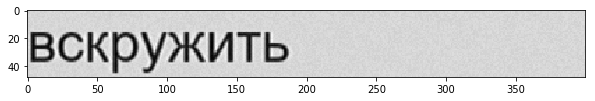

In [234]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# text = "Внимание! означает согласие с условиями поставки товара."
text = "вскружить"# для заполнения платежного поручения"#"30101810000000000201"

print(text_len)
w,h = 400, 48
num_inn = rd.randint(0, 9999999999)
# text = "{:010d}".format(num_inn)
# img = generate_image(text, font_size=20)

img = generate_image(text, w, h, "./fonts/Arial.ttf" ,font_size=40)
text_len = len(text)
height = int(100 / (text_len / 20))
print(np.log(text_len))
print(height)
img = cv2.resize(img, (400,96))[:height, :,:]

kernel_sharpen = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
kernel_gaussian_blur = np.array([[1,2,1], [2,4,2], [1,2,1]]) / 16

img = speckle(img, 30)
img = cv2.filter2D(img, -1, kernel_gaussian_blur)
img = sp_noise2(img,3)
img = cv2.filter2D(img, -3, kernel_sharpen)
img = cv2.resize(img, (300,36))
img = cv2.resize(img, (400,48))
img = sp_noise2(img,10)

# img = cv2.filter2D(img, -3, kernel_sharpen)
# img = cv2.filter2D(img, -1, kernel_sharpen)

# img = noisy(noise_typ[0], img)
# img = np.array(img.astype(np.ubyte))
# img[img > 255] = 255
# img[img <= 0] = 0



fig = plt.figure(figsize=(10, 10))
plt.imshow(img[:,:,0], cmap='gray')

In [114]:
import sys
# Add the ptdraft folder path to the sys.path list
sys.path.append('../Augmentor/')
# sys.path.append('../generate_license_plates-master/')
import Augmentor

In [ ]:
p = Augmentor.Pipeline()
# width = int(w*1.7)
# height = int(h*1.7)
# p.zoom(probability=1, min_factor=0.6, max_factor=0.7)
# p.skew_tilt(probability=0.5,magnitude=0.05)
# p.rotate(probability=0.5, max_left_rotation=0.5, max_right_rotation=0.5)
# p.shear(probability=0.5, max_shear_left=0.5, max_shear_right=0.5)

In [ ]:
p = Augmentor.Pipeline()
w = int(200)
h = int(24)
print(w,h)
p.random_distortion(1, grid_width=w, grid_height=h, magnitude=1)

In [ ]:
img2 = np.asarray(p.sample_with_array(img))
plt.imshow(img2)

In [ ]:
img3 = speckle(img2)
plt.imshow(img3)

In [231]:
def load_dict(filename):
    with open(filename, 'r',encoding='cp1251') as f:
        data = f.read()
        with open("./data/words_dict2.txt", "w") as w:
            w.write(data)
#         data = [d[:98].strip() for d in data]
        
#         a=  [text_to_labels(d) for d in data]
#         print("data len:", str(len(data)))
#         print(a)
    return data

In [232]:
dict_words = load_dict("./data/words_dict.txt")[:10]

In [233]:
dict_words[:100]

'а\nа-а-а\nаа'